##  Previsão de Vendas - Análise Exploratória
##### O objetivo desse desafio é desenvolver um modelo para previsão de vendas (sell-out) para integrar o processo de planejamento de demanda do grupo. Este processo tem como objetivo orientar o plano de produção da indústria. Em outras palavras, a partir dessa previsão de vendas a Indústria irá estabelecer quais produtos e quando fabricá-los.

- Justificar a abordagem escolhida para a modelagem;
- Justificar a escolha da(s) métrica(s) de avaliação do modelo;
- Separar os entregáveis 1 e 2 em dois Jupyter Notebooks;
- Utilize os notebooks para responder questionamentos e discutir sobre resultados;
- Subir os entregáveis no GitHub e enviar o link 


**O que você aprenderá neste caderno?**

- Análise Exploratória de Dados: Compreenderemos as principais características do dataset, identificando os materiais (SKU) mais vendidos, as melhores regiões e canais de vendas, bem como as categorias de materiais que mais vendem.
- Impacto de Datas Comemorativas: Avaliaremos como as datas comemorativas influenciam as vendas, diferenciando por canais de vendas e explorando a variação da receita bruta em diferentes contextos.
- Teste de Hipóteses: Realizaremos testes estatísticos para entender a significância das diferenças nas vendas entre datas comemorativas e não comemorativas.
- Modelagem de Previsão de Vendas (Em outro notebook): Exploraremos técnicas de modelagem para prever as vendas futuras, com o objetivo de auxiliar no planejamento de demanda e produção.

Este caderno é baseado em dados de vendas (sell-out) de um grande grupo brasileiro, um dos maiores varejistas no Brasil. O objetivo principal é desenvolver um modelo para previsão de vendas que possa ser integrado ao processo de planejamento de demanda da empresa, ajudando a indústria a determinar quais produtos produzir e em que quantidade, com base em previsões de vendas precisas.

Os dados incluem várias colunas de informações relevantes, como períodos de vendas, presença de datas comemorativas, códigos de materiais (SKU), canais de vendas, categorias de materiais, regiões de vendas, quantidade de vendas e devoluções, receitas bruta e líquida, campanhas de marketing e percentuais de desconto.




**Estrutura do Dataset:**

1. **<code>*COD_CICLO:*</code>** Indicação de período definido por marketing.
2. **<code>*FLG_DATA_COMEMORATIVA:*</code>** Indicação se o ciclo pertence a alguma data comemorativa nacional.
3. **<code>*COD_MATERIAL:*</code>** Código referente ao material (SKU).
4. **<code>*COD_CANAL:*</code>** Canal de vendas onde foi efetuada a venda.
5. **<code>*DES_CATEGORIA_MATERIAL:*</code>** Categoria do material.
6. **<code>*DES_MARCA_MATERIAL:*</code>** Marca do material.
7. **<code>*COD_REGIAO:*</code>** Região onde a venda foi efetuada.
8. **<code>*QT_VENDA_BRUTO:*</code>** Quantidade de itens vendidos.
9. **<code>*QT_DEVOLUCAO:*</code>** Quantidade de itens devolvidos.
10. **<code>*VL_RECEITA_BRUTA:*</code>** Valor da receita bruta.
11. **<code>*VL_RECEITA_LIQUIDA:*</code>** Valor da receita líquida.
12. **<code>*FLG_CAMPANHA_MKT_A a E:*</code>** Indicadores de campanhas de marketing de diferentes tipos.
13. **<code>*PCT_DESCONTO:*</code>** Percentual de desconto aplicado.
14. **<code>*VL_PRECO:*</code>** Valor do preço do produto.


Python=3.10.12

# 1. Pacotes

In [2]:
# Import libraries

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from scipy.stats import ttest_ind
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import plotly.graph_objects as go




# 2. Importando os dados

In [3]:
# Import
dataset = pd.read_csv('/home/carlos/Documents/pessoal/case_previsao_vendas/dataset.csv', delimiter=',')

# Converter colunas p/ float
def convert_to_float(column):
    # Verificar se a coluna é do tipo string
    if column.dtype == 'object':
        column = column.str.replace(',', '.')
    return column.astype(float)

# Lista das colunas a serem convertidas
columns_to_convert = ['QT_VENDA_BRUTO', 'VL_RECEITA_BRUTA' , 'VL_RECEITA_LIQUIDA', 'VL_PRECO', 'PCT_DESCONTO','FLG_CAMPANHA_MKT_A', 'FLG_CAMPANHA_MKT_B', 'FLG_CAMPANHA_MKT_C', 'FLG_CAMPANHA_MKT_D', 'FLG_CAMPANHA_MKT_E']

# Aplicando a função a todas as colunas listadas
for column in columns_to_convert:
    dataset[column] = convert_to_float(dataset[column])

dataset.head(3)

,COD_CICLO,FLG_DATA,COD_MATERIAL,COD_CANAL,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,COD_REGIAO,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,VL_RECEITA_LIQUIDA,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E,PCT_DESCONTO,VL_PRECO
0,201917,1,431148,anon_S0,anon_S2,anon_S3,anon_S1,11934.0,0,414.0,431869.0,80000.0,431869.0,80000.0,0.0,0.0,0.0,0.0
1,202005,0,177816,anon_S0,anon_S2,anon_S4,anon_S1,540.0,0,252.0,27743.0,400000.0,27743.0,400000.0,0.0,0.0,0.0,0.0
2,201901,0,171786,anon_S0,anon_S5,anon_S6,anon_S1,54012.0,0,1410.0,962860.0,200000.0,962860.0,200000.0,0.0,1.0,0.0,0.0


In [4]:
# dataset format

dataset.shape

(173923, 18)

In [5]:
# dataset information (column type, not null lines )

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173923 entries, 0 to 173922
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COD_CICLO               173923 non-null  int64  
 1   FLG_DATA                173923 non-null  int64  
 2   COD_MATERIAL            173923 non-null  int64  
 3   COD_CANAL               173923 non-null  object 
 4   DES_CATEGORIA_MATERIAL  173923 non-null  object 
 5   DES_MARCA_MATERIAL      173923 non-null  object 
 6   COD_REGIAO              173923 non-null  object 
 7   QT_VENDA_BRUTO          173923 non-null  float64
 8   QT_DEVOLUCAO            173923 non-null  int64  
 9   VL_RECEITA_BRUTA        87164 non-null   float64
 10  VL_RECEITA_LIQUIDA      173923 non-null  float64
 11  FLG_CAMPANHA_MKT_A      173923 non-null  float64
 12  FLG_CAMPANHA_MKT_B      173923 non-null  float64
 13  FLG_CAMPANHA_MKT_C      173923 non-null  float64
 14  FLG_CAMPANHA_MKT_D  

In [6]:
# Percentual de valores nulos

print(dataset.isnull().mean() * 100)

COD_CICLO                  0.000000
FLG_DATA                   0.000000
COD_MATERIAL               0.000000
COD_CANAL                  0.000000
DES_CATEGORIA_MATERIAL     0.000000
DES_MARCA_MATERIAL         0.000000
COD_REGIAO                 0.000000
QT_VENDA_BRUTO             0.000000
QT_DEVOLUCAO               0.000000
VL_RECEITA_BRUTA          49.883569
VL_RECEITA_LIQUIDA         0.000000
FLG_CAMPANHA_MKT_A         0.000000
FLG_CAMPANHA_MKT_B         0.000000
FLG_CAMPANHA_MKT_C         0.000000
FLG_CAMPANHA_MKT_D         0.000000
FLG_CAMPANHA_MKT_E         0.000000
PCT_DESCONTO               0.000000
VL_PRECO                   0.000000
dtype: float64


*FLG_DATA:* Indicador binário de data comemorativa. A média é 0.29, sugerindo que cerca de 29% das observações estão associadas a datas comemorativas

*COD_MATERIAL:* Código do material (SKU). A média é 297755.59, com uma ampla variação (std = 150472.61), refletindo a diversidade de produtos no dataset.

*QT_DEVOLUCAO:* Quantidade de devoluções. O valor médio é 2175,27, mas a distribuição é muito dispersa (std = 40.335), com um máximo de 999.800 devoluções.

*VL_RECEITA_BRUTA:* Valor da receita bruta. A média é 491.80, com um desvio padrão de 722.86, indicando variação significativa nos valores de receita.

*FLG_CAMPANHA_MKT_A até FLG_CAMPANHA_MKT_E:*    

- Todas essas colunas indicam variabilidade de investimento em marketing

In [7]:
dataset.describe()

,COD_CICLO,FLG_DATA,COD_MATERIAL,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,VL_RECEITA_LIQUIDA,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E,PCT_DESCONTO,VL_PRECO
count,173923.000000,173923.000000,173923.000000,1.739230e+05,173923.000000,87164.000000,1.739230e+05,173923.000000,1.739230e+05,173923.000000,173923.000000,173923.000000,173923.000000,173923.000000
mean,201915.886553,0.289220,297755.596339,1.050376e+04,2175.272966,491.800720,6.475494e+05,435891.745198,6.421882e+05,440891.888939,0.016956,0.279388,0.045917,0.072981
std,85.864130,0.453402,150472.609616,3.327551e+04,40335.350003,722.866615,2.790452e+06,284541.500026,2.780483e+06,285032.374040,0.129106,0.448700,0.209305,0.260105
min,201801.000000,0.000000,6246.000000,2.340000e+02,0.000000,234.000000,2.340000e+02,0.000000,2.340000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201815.000000,0.000000,152658.000000,3.960000e+02,0.000000,234.000000,6.369500e+03,200000.000000,6.273000e+03,200000.000000,0.000000,0.000000,0.000000,0.000000
50%,201911.000000,0.000000,420546.000000,2.070000e+03,0.000000,270.000000,6.738000e+04,400000.000000,6.663500e+04,400000.000000,0.000000,0.000000,0.000000,0.000000
75%,202006.000000,1.000000,439656.000000,8.634000e+03,0.000000,444.000000,3.468340e+05,660000.000000,3.427420e+05,680000.000000,0.000000,1.000000,0.000000,0.000000
max,202101.000000,1.000000,502386.000000,1.865862e+06,999800.000000,31662.000000,2.292459e+08,980000.000000,2.292459e+08,980000.000000,1.000000,1.000000,1.000000,1.000000


1. *FLG_DATA (2 valores únicos):* Um indicador binário que identifica se uma venda ocorreu durante uma data comemorativa. Existem apenas 2 valores, representando "Sim" e "Não".

2. *COD_CANAL (2 valores únicos):* Identifica o canal de vendas. Com apenas 2 canais diferentes, é possível que as vendas sejam segregadas entre dois grandes canais, como online e físico

3. *DES_CATEGORIA_MATERIAL (6 valores únicos):* Descreve a categoria dos materiais vendidos. Existem 6 categorias distintas, representando diferentes tipos de produtos.

4. *COD_REGIAO (2 valores únicos):* Refere-se à região onde a venda foi realizada. Com 2 regiões diferentes, pode-se analisar como as vendas variam entre elas.

5. *COD_MATERIAL (2252 valores únicos):* Representa o código de identificação do material (SKU). Existem 2252 materiais distintos, mostrando uma alta diversidade de produtos.

6. *VL_PRECO (2 valores únicos):* Refere-se ao preço dos produtos, com 2 valores distintos, indicando uma estrutura de preços bastante rígida ou simples.


In [8]:
dataset.nunique()

COD_CICLO                     53
FLG_DATA                       2
COD_MATERIAL                2252
COD_CANAL                      2
DES_CATEGORIA_MATERIAL         6
DES_MARCA_MATERIAL            85
COD_REGIAO                     2
QT_VENDA_BRUTO             14468
QT_DEVOLUCAO                  67
VL_RECEITA_BRUTA            1043
VL_RECEITA_LIQUIDA        105813
FLG_CAMPANHA_MKT_A            50
FLG_CAMPANHA_MKT_B        108065
FLG_CAMPANHA_MKT_C            50
FLG_CAMPANHA_MKT_D             2
FLG_CAMPANHA_MKT_E             2
PCT_DESCONTO                   2
VL_PRECO                       2
dtype: int64

In [9]:
dataset['COD_MATERIAL'].value_counts()

COD_MATERIAL
425172    212
443208    212
426810    212
170394    212
118344    212
         ... 
100938      1
16500       1
120450      1
47712       1
100896      1
Name: count, Length: 2252, dtype: int64

1. COD_CANAL: 
    - anon_S0: 87.164 ocorrências.
    - anon_S7: 86.759 ocorrências.

2. DES_CATEGORIA_MATERIAL:
    - anon_S2, anon_S5, anon_S12

3. COD_MATERIAL:
    - 425172, 443208, 426810


In [10]:
# Distribuição das variáveis categóricas

print("\nDistribuição das variáveis categóricas:")
for col in dataset.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(dataset[col].value_counts())


Distribuição das variáveis categóricas:

COD_CANAL:
COD_CANAL
anon_S0    87164
anon_S7    86759
Name: count, dtype: int64

DES_CATEGORIA_MATERIAL:
DES_CATEGORIA_MATERIAL
anon_S2     44292
anon_S5     44242
anon_S12    42918
anon_S11    24989
anon_S18    10489
anon_S30     6993
Name: count, dtype: int64

DES_MARCA_MATERIAL:
DES_MARCA_MATERIAL
anon_S8     35297
anon_S24    25787
anon_S22    11681
anon_S23    11641
anon_S20    11429
            ...  
anon_S88        1
anon_S84        1
anon_S82        1
anon_S92        1
anon_S94        1
Name: count, Length: 85, dtype: int64

COD_REGIAO:
COD_REGIAO
anon_S1     87700
anon_S10    86223
Name: count, dtype: int64


In [11]:
# Frequência relativa das categorias

print("\nFrequência relativa das categorias para COD_CANAL:")
print(dataset['COD_CANAL'].value_counts(normalize=True))

print("\nFrequência relativa das categorias para DES_CATEGORIA_MATERIAL:")
print(dataset['DES_CATEGORIA_MATERIAL'].value_counts(normalize=True))

print("\nFrequência relativa das categorias para DES_MARCA_MATERIAL:")
print(dataset['DES_MARCA_MATERIAL'].value_counts(normalize=True))


Frequência relativa das categorias para COD_CANAL:
COD_CANAL
anon_S0    0.501164
anon_S7    0.498836
Name: proportion, dtype: float64

Frequência relativa das categorias para DES_CATEGORIA_MATERIAL:
DES_CATEGORIA_MATERIAL
anon_S2     0.254664
anon_S5     0.254377
anon_S12    0.246764
anon_S11    0.143679
anon_S18    0.060308
anon_S30    0.040207
Name: proportion, dtype: float64

Frequência relativa das categorias para DES_MARCA_MATERIAL:
DES_MARCA_MATERIAL
anon_S8     0.202946
anon_S24    0.148267
anon_S22    0.067162
anon_S23    0.066932
anon_S20    0.065713
              ...   
anon_S88    0.000006
anon_S84    0.000006
anon_S82    0.000006
anon_S92    0.000006
anon_S94    0.000006
Name: proportion, Length: 85, dtype: float64


In [12]:
# Convertendo colunas categóricas em códigos numéricos e ajustando 'COD_CANAL':

# 1. Remove o prefixo 'anon_S' da coluna 'COD_CANAL' e converte os valores restantes para inteiros.
# 2. Transforma as colunas 'DES_CATEGORIA_MATERIAL', 'DES_MARCA_MATERIAL', e 'COD_REGIAO' em tipo categórico e gera códigos numéricos para cada categoria única.

dataset['COD_CANAL'] = dataset['COD_CANAL'].str.replace('anon_S', '').astype(int)
dataset['DES_CATEGORIA_MATERIAL'] = dataset['DES_CATEGORIA_MATERIAL'].astype('category').cat.codes
dataset['DES_MARCA_MATERIAL'] = dataset['DES_MARCA_MATERIAL'].astype('category').cat.codes
dataset['COD_REGIAO'] = dataset['COD_REGIAO'].astype('category').cat.codes

1. Correlação significativa (0.91) entre FLG_CAMPANHA_MKT_B com QT_VENDA_BRUTO
2. Correlação significativa (0.91) entre QT_VENDA_BRUTO com VL_RECEITA_LIQUIDA
3. Correlação significativa (0.69) entre QT_VENDA_BRUTO com VL_RECEITA_BRUTO
4. Correlação significativa (0.69) entre FLG_CAMPANHA_MKT_A com FLG_CAMPANHA_MKT_C
5. Correlação significativa (1.00) entre FLG_CAMPANHA_MKT_A com VL_RECEITA_LIQUIDA


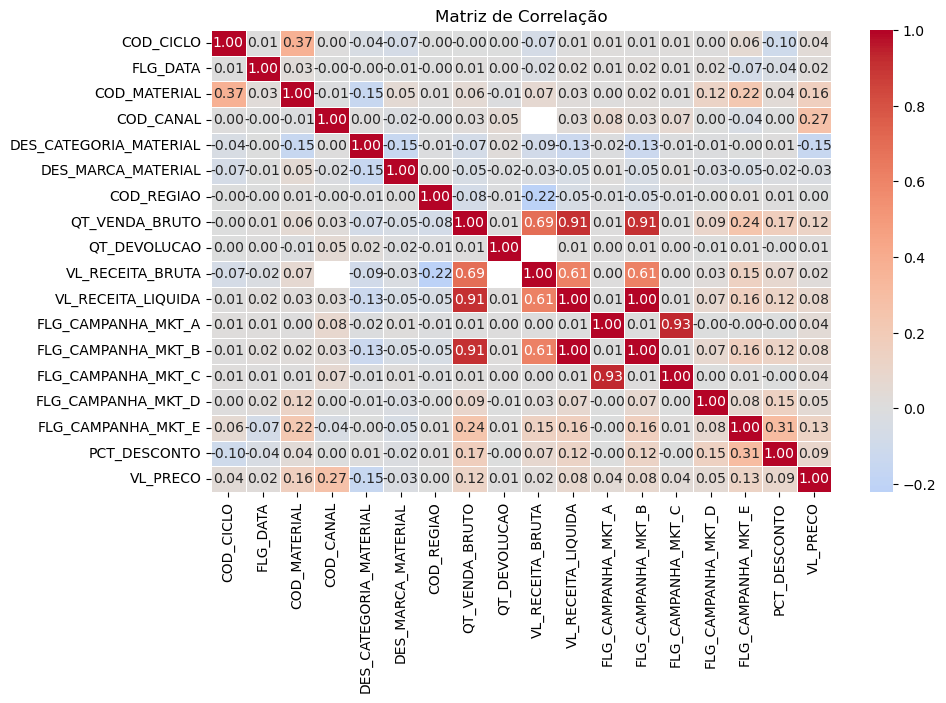

In [13]:
# Tabela de correlação entre variáveis do dataset, com valores variando de -1 a 1:

correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


##### - Verificando as correlações com a variavel VL_RECEITA_BRUTA pois é a unica que possui valores NaN, como temos correlçaões altas com VL_RECEITA_lIQUIDA E QT_VENDA_BRUTA podemos usar a tecnica com Regressão linear para completar os vazios

In [14]:
# Separa dados completos e incompletos, treina um modelo de regressão linear com dados completos e usa o modelo para imputar valores faltantes no dataset.

# Separar dados completos e incompletos
df_complete = dataset.dropna(subset=['VL_RECEITA_BRUTA'])
df_incomplete = dataset[dataset['VL_RECEITA_BRUTA'].isna()]

# Modelagem
X_train = df_complete[['VL_RECEITA_LIQUIDA', 'QT_VENDA_BRUTO']]
y_train = df_complete['VL_RECEITA_BRUTA']
model = LinearRegression()
model.fit(X_train, y_train)

# Imputação
X_missing = df_incomplete[['VL_RECEITA_LIQUIDA', 'QT_VENDA_BRUTO']]
df_incomplete['VL_RECEITA_BRUTA'] = model.predict(X_missing)
dataset.update(df_incomplete)

/tmp/ipykernel_284797/718834005.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incomplete['VL_RECEITA_BRUTA'] = model.predict(X_missing)


#### As correlações fortes antes da atualização dos valores nulos se mantiveram fortes, porem aumentando sua correlação anterior.

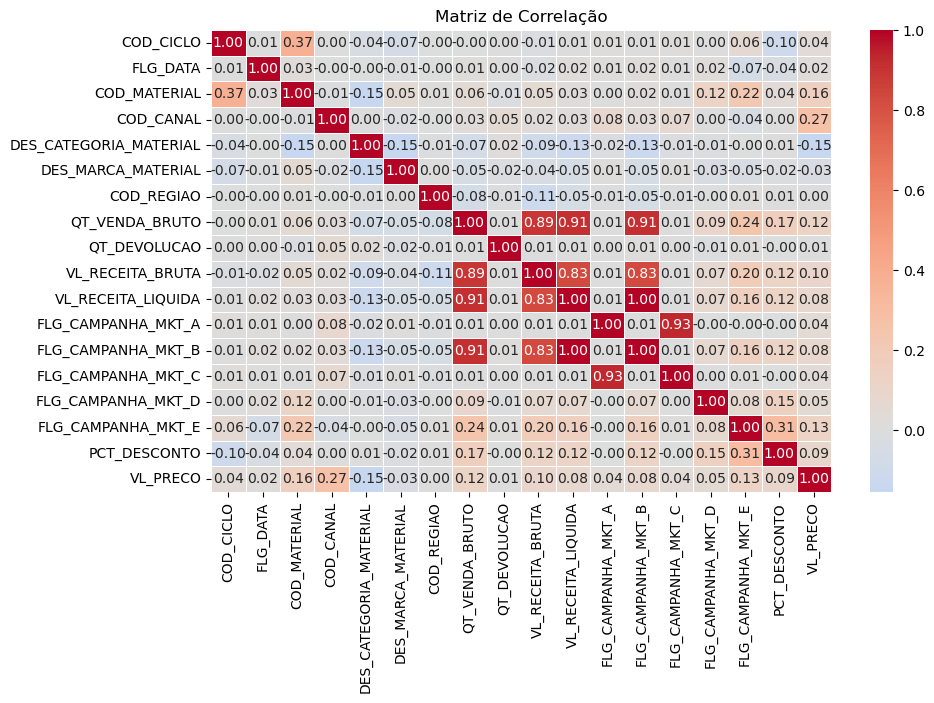

In [15]:
# Tabela de correlação entre variáveis do dataset, com valores variando de -1 a 1:
# Vl_receita bruta atualizado os valores NaN 

correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


In [16]:
# Exibindo resumo estatístico da coluna VL_RECEITA_BRUTA

print(dataset['VL_RECEITA_BRUTA'].describe())


count    173923.000000
mean        511.802061
std         814.825423
min         234.000000
25%         270.000000
50%         307.162687
75%         450.000000
max       44166.357864
Name: VL_RECEITA_BRUTA, dtype: float64


In [17]:
# Supondo que você já tenha seu DataFrame
dataset['COD_CICLO'] = dataset['COD_CICLO'].astype(str)

# Separar ano e semana
dataset['Ano'] = dataset['COD_CICLO'].str[:4].astype(int)
dataset['Ciclo'] = dataset['COD_CICLO'].str[4:].astype(int)

# Converter para data usando a função pd.to_datetime
dataset['Data'] = pd.to_datetime(dataset['Ano'].astype(str) + dataset['Ciclo'].astype(str).str.zfill(2) + '0', format='%Y%W%w')

# Agora você pode ordenar e usar para séries temporais
dataset = dataset.sort_values('Data')

print(dataset[['COD_CICLO', 'Data']])

       COD_CICLO       Data
68524     201801 2018-01-07
2515      201801 2018-01-07
94744     201801 2018-01-07
113155    201801 2018-01-07
19222     201801 2018-01-07
...          ...        ...
77100     202101 2021-01-10
77044     202101 2021-01-10
77023     202101 2021-01-10
13749     202101 2021-01-10
118582    202101 2021-01-10

[173923 rows x 2 columns]


### Insights

1. <code>*Alta Variabilidade:*</code> Alguns grupos, especialmente *COD_CANAL = 0* e *COD_REGIAO = 0*, e *COD_CANAL = 7*, mostram alta variabilidade na receita bruta, com valores extremos significativos. Isso pode indicar grandes transações ou clientes de alto valor.

2. <code>*Diferença de Receita Média:*</code> O grupo *COD_CANAL = 0* e *COD_REGIAO = 0* tem a maior média de receita bruta, enquanto *COD_CANAL = 0* e *COD_REGIAO = 1* tem a menor média. Grupos com alta média podem ser mais lucrativos e merecem mais foco.

3. <code>*Valores Máximos Altos:*</code> Alguns grupos têm valores máximos muito elevados, sugerindo a presença de grandes transações que impactam significativamente a receita total.

4. <code>*Desvio Padrão Elevado:*</code> Altos desvios padrões indicam grande variação nos valores de receita bruta, refletindo diferentes padrões de transação entre canais e regiões.


### Recomendações

1. <code>*Investigue Grandes Transações:*</code> Analisar as transações de alto valor pode revelar oportunidades para replicar ou expandir essas receitas.

2. <code>*Ajuste Estratégias:*</code> Personalize estratégias de marketing e vendas com base nas diferenças de receita média entre canais e regiões.

3. <code>*Gerencie Variabilidade:*</code> Monitorar e entender a alta variabilidade pode ajudar a otimizar a gestão de receitas e melhorar previsões

In [18]:
# Lista de colunas para iteração
columns_to_filter = ['COD_REGIAO', 'COD_CANAL']
unique_values = {col: dataset[col].unique() for col in columns_to_filter}

# Criar a figura
fig = go.Figure()

# Iterando sobre todas as combinações de valores das variáveis
for regiao in unique_values['COD_REGIAO']:
    for canal in unique_values['COD_CANAL']:
        df_subset = dataset[(dataset['COD_REGIAO'] == regiao) &
                            (dataset['COD_CANAL'] == canal)]
                
        if not df_subset.empty:
            # Agregando os dados
            df_grouped = df_subset.groupby('COD_CICLO')['VL_RECEITA_BRUTA'].sum().reset_index()
            
            # Adicionando a linha ao gráfico
            fig.add_trace(go.Scatter(x=df_grouped['COD_CICLO'],
                                     y=df_grouped['VL_RECEITA_BRUTA'],
                                     mode='lines',
                                     name=f'Região: {regiao}, Canal: {canal}'))

# Adicionando títulos e rótulos
fig.update_layout(
    title='VL_RECEITA_BRUTA por COD_CICLO',
    xaxis_title='COD_CICLO',
    yaxis_title='VL_RECEITA_BRUTA',
    legend_title='Legenda',
    legend=dict(x=1, y=1)  # Posiciona a legenda fora do gráfico
)

# Exibindo o gráfico
fig.show()


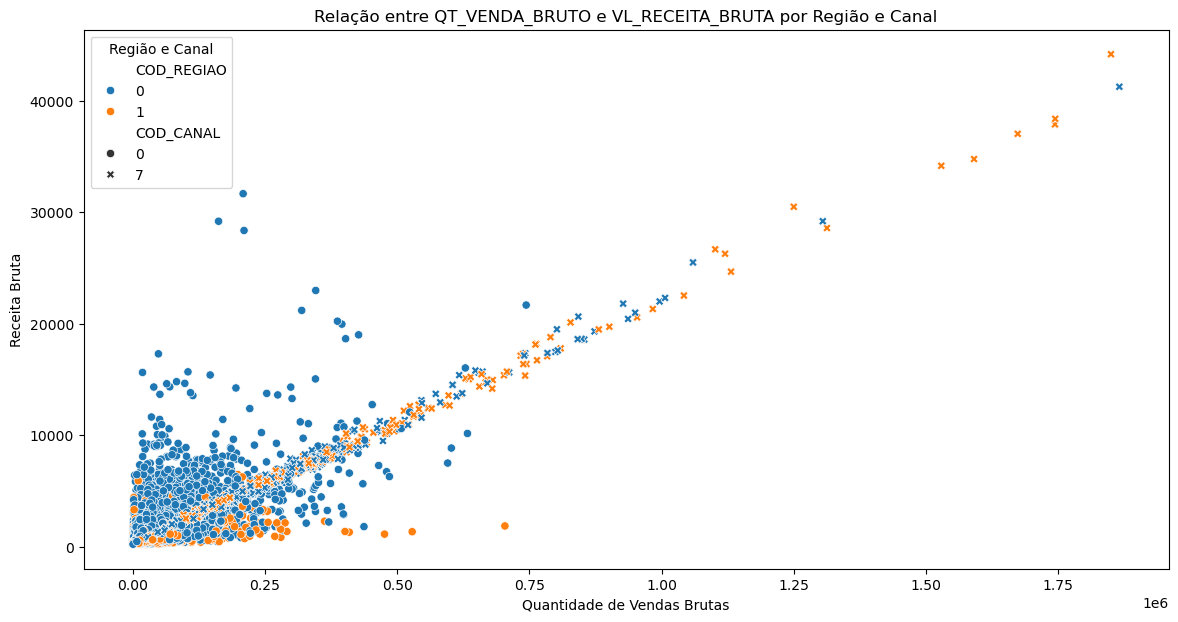

In [19]:
# Gráfico de dispersão para cada região e canal
plt.figure(figsize=(14, 7))
sns.scatterplot(data=dataset, x='QT_VENDA_BRUTO', y='VL_RECEITA_BRUTA', hue='COD_REGIAO', style='COD_CANAL')
plt.title('Relação entre QT_VENDA_BRUTO e VL_RECEITA_BRUTA por Região e Canal')
plt.xlabel('Quantidade de Vendas Brutas')
plt.ylabel('Receita Bruta')
plt.legend(title='Região e Canal')
plt.show()

### Resumo de Insights

1. <code>*Variação de Receita:*</code> A receita bruta dos materiais muda ao longo do tempo, com picos e quedas que podem refletir eventos ou sazonalidade.

2. <code>*Desempenho Regional e Canal:*</code> A receita varia entre regiões e canais, indicando onde os materiais são mais ou menos lucrativos.

3. <code>*Materiais Lucrativos:*</code> Identifique quais materiais geram mais receita e foque neles para estratégias de vendas.

4. <code>*Estabilidade de Receita:*</code> Observe quais materiais têm receita consistente versus variabilidade alta.

In [20]:
grouped_stats = dataset.groupby(['COD_CANAL', 'COD_REGIAO'])[['COD_CICLO', 'VL_RECEITA_BRUTA']].describe()

# Mostra o resumo estatístico
print(grouped_stats)

                     VL_RECEITA_BRUTA                                      \
                                count        mean         std         min   
COD_CANAL COD_REGIAO                                                        
0         0                   43834.0  650.719807  964.291824  234.000000   
          1                   43330.0  331.033141  243.086896  234.000000   
7         0                   43866.0  554.359750  834.059048  293.311533   
          1                   42893.0  508.924230  957.193452  293.308004   

                                                                       
                             25%        50%         75%           max  
COD_CANAL COD_REGIAO                                                   
0         0           240.000000  336.00000  648.000000  31662.000000  
          1           234.000000  252.00000  312.000000   6492.000000  
7         0           295.201545  342.98579  503.096361  41248.458879  
          1           295.89

### - Calcular os 3 materiais mais vendidos

### Insights

1. Materiais com  maior receita bruta entre os listados.

    1.1. Percentualemente, os 3 materiais mais produzidos não representam um valor significante do total
    
    1.2. Sugere a quebra de granularidade na categoria do material antes mesmo por SKU.

In [21]:
# Calcular os 3 materiais mais vendidos

top_materials = dataset.groupby('COD_MATERIAL')['VL_RECEITA_BRUTA'].sum().nlargest(3).index

# Criar uma lista para armazenar os dados agregados
data = []

# Iterar sobre os 3 materiais mais vendidos
for material in top_materials:
    df_filtered_material = dataset[dataset['COD_MATERIAL'] == material]

    # Iterar sobre todas as combinações de COD_REGIAO e COD_CANAL
    for regiao in df_filtered_material['COD_REGIAO'].unique():
        for canal in df_filtered_material['COD_CANAL'].unique():
            df_subset = df_filtered_material[(df_filtered_material['COD_REGIAO'] == regiao) &
                                             (df_filtered_material['COD_CANAL'] == canal)]
            
            if not df_subset.empty:
                # Agregar os dados
                df_grouped = df_subset.groupby('COD_CICLO')['VL_RECEITA_BRUTA'].sum().reset_index()
                
                # Adicionar os dados à lista
                for _, row in df_grouped.iterrows():
                    data.append({
                        'Material': material,
                        'Região': regiao,
                        'Canal': canal,
                        'COD_CICLO': row['COD_CICLO'],
                        'VL_RECEITA_BRUTA': row['VL_RECEITA_BRUTA']
                    })

# Criar o DataFrame a partir dos dados agregados
df_summary = pd.DataFrame(data)

# Exibir o DataFrame
print(df_summary)

     Material  Região  Canal COD_CICLO  VL_RECEITA_BRUTA
0      177396       1      7    201801       5208.561592
1      177396       1      7    201802       1059.661842
2      177396       1      7    201803       7365.125050
3      177396       1      7    201804       1352.038034
4      177396       1      7    201805        926.324381
..        ...     ...    ...       ...               ...
631     69198       1      7    202014      34769.341313
632     69198       1      7    202015       2012.954117
633     69198       1      7    202016      13576.735987
634     69198       1      7    202017       3321.598783
635     69198       1      7    202101      38375.811903

[636 rows x 5 columns]


In [22]:
# Receita total 

total_receita_bruta = dataset['VL_RECEITA_BRUTA'].sum()
total_receita_bruta

89014149.79032545

In [23]:
# Filtrar transações com alta receita bruta

high_value_transactions = dataset[dataset['VL_RECEITA_BRUTA'] > dataset['VL_RECEITA_BRUTA'].quantile(0.95)]

# Exibir as principais transações de alto valor

print(high_value_transactions[['COD_MATERIAL', 'COD_REGIAO', 'COD_CANAL', 'COD_CICLO', 'VL_RECEITA_BRUTA']])

        COD_MATERIAL  COD_REGIAO  COD_CANAL COD_CICLO  VL_RECEITA_BRUTA
70452         177840           0          7    201801       1518.448352
108747        157410           0          0    201801       2388.000000
94690         173718           0          7    201801       3884.496453
108697        146526           1          7    201801       1655.604629
164846        173112           1          0    201801       1860.000000
...              ...         ...        ...       ...               ...
167663        128142           0          0    202101       3774.000000
77835         173106           0          7    202101       2030.664044
77705         427008           0          0    202101       2460.000000
138013        437820           0          0    202101       1440.000000
137879        447018           0          0    202101       1926.000000

[8681 rows x 5 columns]


### Resumo

1. Total de 6 categorias

    - categoria 1 é a maior responsável pela receita bruta (36,85% do total).

    - Categoria 4 segue com 26,78%.
    
    - Categoria 5 representa 18,60%.

2. *Categoria 1 e Categoria 4* têm um grande potencial de crescimento. Focar nessas categorias pode ser uma estratégia eficaz para aumentar a receita total.

3. Melhorar as estratégias de marketing e vendas para as *Categorias 2 e 3* pode ajudar a aumentar a receita nessas áreas.

In [24]:
# Calcular a receita bruta total
total_receita_bruta = dataset['VL_RECEITA_BRUTA'].sum()

# Calcular a receita bruta total por categoria
receita_por_categoria = dataset.groupby('DES_CATEGORIA_MATERIAL')['VL_RECEITA_BRUTA'].sum()

# Calcular o percentual de cada categoria
percentual_por_categoria = (receita_por_categoria / total_receita_bruta) * 100

# Exibir os resultados
print("Receita Bruta Total por Categoria:")
print(receita_por_categoria)
print("\nPercentual de Receita Bruta por Categoria:")
print(percentual_por_categoria)

Receita Bruta Total por Categoria:
DES_CATEGORIA_MATERIAL
0    9.513483e+06
1    3.280299e+07
2    3.668076e+06
3    2.383551e+07
4    2.641397e+06
5    1.655269e+07
Name: VL_RECEITA_BRUTA, dtype: float64

Percentual de Receita Bruta por Categoria:
DES_CATEGORIA_MATERIAL
0    10.687608
1    36.851437
2     4.120778
3    26.777218
4     2.967391
5    18.595568
Name: VL_RECEITA_BRUTA, dtype: float64


### Observação: A receita bruta tem grande variação e valores extremos, com alguns outliers significativos.
#### Com base no quartil, foi feito o data clean 

In [25]:
# Estatísticas de resumo
summary_stats = dataset['VL_RECEITA_BRUTA'].describe()

# Quartis e IQR
Q1 = dataset['VL_RECEITA_BRUTA'].quantile(0.25)
Q3 = dataset['VL_RECEITA_BRUTA'].quantile(0.75)
IQR = Q3 - Q1

print("Estatísticas Descritivas:")
print(summary_stats)
print("\nQuartis e Intervalo Interquartílico (IQR):")
print(f"Q1 (25º Percentil): {Q1}")
print(f"Q3 (75º Percentil): {Q3}")
print(f"IQR: {IQR}")
print(f"Limite Inferior para Outliers: {Q1 - 1.5 * IQR}")
print(f"Limite Superior para Outliers: {Q3 + 1.5 * IQR}")


Estatísticas Descritivas:
count    173923.000000
mean        511.802061
std         814.825423
min         234.000000
25%         270.000000
50%         307.162687
75%         450.000000
max       44166.357864
Name: VL_RECEITA_BRUTA, dtype: float64

Quartis e Intervalo Interquartílico (IQR):
Q1 (25º Percentil): 270.0
Q3 (75º Percentil): 450.0
IQR: 180.0
Limite Inferior para Outliers: 0.0
Limite Superior para Outliers: 720.0


In [26]:
# Filtrando dados para remover outliers
dataset_cleaned = dataset[(dataset['VL_RECEITA_BRUTA'] >= 0) & (dataset['VL_RECEITA_BRUTA'] <= 720)]
dataset_cleaned.head(3)

,COD_CICLO,FLG_DATA,COD_MATERIAL,COD_CANAL,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,COD_REGIAO,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,...,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E,PCT_DESCONTO,VL_PRECO,Ano,Ciclo,Data
68524,201801,0,443142,0,5,6,1,10068.0,0,294.000000,...,600000.0,281610.0,180000.0,0.0,1.0,0.0,0.0,2018,1,2018-01-07
2515,201801,0,147546,7,5,20,0,240.0,0,293.425546,...,400000.0,413.0,400000.0,0.0,0.0,0.0,0.0,2018,1,2018-01-07
94744,201801,0,420630,7,5,20,1,2388.0,0,335.404558,...,80000.0,43003.0,80000.0,0.0,1.0,0.0,0.0,2018,1,2018-01-07


### Feature importance

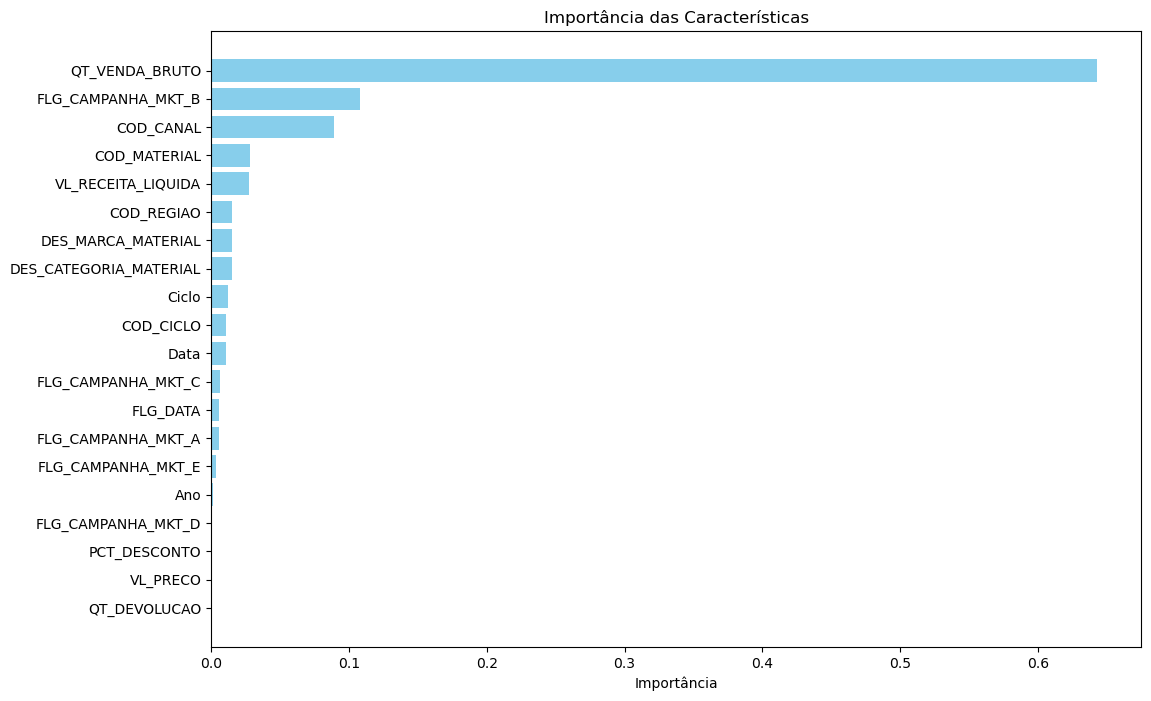

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Separar características e variável alvo
X = dataset_cleaned.drop('VL_RECEITA_BRUTA', axis=1)
y = dataset_cleaned['VL_RECEITA_BRUTA']

# Converter colunas de data/hora para formato numérico
for col in X.select_dtypes(include=['datetime']).columns:
    X[col] = (X[col] - X[col].min()).dt.days

# Ajustar um modelo Random Forest
model = RandomForestRegressor()
model.fit(X, y)

# Obter as importâncias das características
importance = pd.Series(model.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)

# Plotar a importância das características
plt.figure(figsize=(12, 8))
plt.barh(importance.index, importance.values, color='skyblue')
plt.xlabel('Importância')
plt.title('Importância das Características')
plt.gca().invert_yaxis()  # Inverter o eixo y para ter as características mais importantes no topo
plt.show()


#### Exportando dataset para inferencia

In [28]:
low_correlation_features = [
    'QT_DEVOLUCAO',
    'FLG_CAMPANHA_MKT_D',
    'PCT_DESCONTO',
    'VL_PRECO',
    'Ano'
]


dataset_to_predict = dataset.drop(columns=low_correlation_features)

# Exibir as primeiras linhas do dataset filtrado
dataset_to_predict.to_csv('dataset_to_predict.csv')

# Resumo


### Nossa exploração perspicaz do conjunto de dados de vendas da Boticario, rendeu insights valioso. 

## Impacto do não entendimento da Data

#### Em um case diário do processo de análise, o setor de marketing deverá ser consultado para entendimento do formato de data.
#### - **Dificuldade na Análise Temporal:** O formato não convencional dificulta a agregação de dados por períodos (semanas, meses, anos), tornando a identificação de padrões sazonais e tendências mais complexa.
#### - **Conversão Complexa:** A necessidade de converter YYYYDD para um formato padrão (YYYY-MM-DD) para análises temporais pode resultar em erros, afetando a precisão das previsões.

## 1. Foco em Segmentos Lucrativos:

#### **Insight:** A receita bruta é significativamente maior para o grupo COD_CANAL = 0 e COD_REGIAO = 0.

#### Priorize a produção e marketing para os segmentos que demonstram maior lucratividade. Considere alocar mais recursos e ajustar as estratégias de produção para atender à demanda nesses grupos específicos.

## 2. Gerenciamento de Produtos com Alta Receita

#### **Insight:** A Categoria 1 é a maior responsável pela receita bruta, representando 36,85% do total, e a Categoria 4 contribui com 26,78%.

#### Foque na otimização da produção e no marketing das categorias mais lucrativas. Avalie oportunidades para expandir a oferta e aumentar a visibilidade dessas categorias.

## 3. Monitoramento de Grandes Transações:

#### **Insight:** Alguns grupos de dados mostram valores máximos extremamente altos, indicando grandes transações.

#### Analise essas grandes transações para identificar padrões e possíveis oportunidades de replicação. Ajuste a produção para atender a esses grandes pedidos e potencialize os ganhos.

## 4. Eficácia das Campanhas de Marketing:

#### **Insight:** Campanhas de marketing como FLG_CAMPANHA_MKT_A e FLG_CAMPANHA_MKT_B têm correlações fortes com aumento nas vendas e receita.

#### Invista mais nas campanhas de marketing que mostraram alta correlação com o aumento nas vendas e receita. Avalie o sucesso dessas campanhas para ajustar futuras estratégias.

## 5. Ajuste de Estratégias de Marketing Baseado em Data Comemorativa:

#### **Insight:** Aproximadamente 29% das vendas ocorrem em datas comemorativas, que podem ter um impacto substancial nas vendas.

#### Planeje campanhas de marketing específicas e aumente a produção antes das datas comemorativas. Use dados históricos para prever a demanda e ajustar o inventário para maximizar as vendas durante esses períodos.

## 6. Aprimoramento da Análise por Categoria e SKU:

#### *Insight:* A diversidade de produtos, com 2252 SKUs distintos, pode tornar difícil identificar quais produtos são mais rentáveis.

#### Realize uma análise mais granular por SKU para identificar os produtos mais lucrativos. Considere a possibilidade de consolidar ou eliminar produtos menos rentáveis e focar em otimizar a oferta de SKUs que contribuem significativamente para a receita.